In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 불러오기

In [31]:
regular = pd.read_csv("data/Regular_Season_Batter.csv")
regular = regular.loc[~regular['OPS'].isnull(),]
submission = pd.read_csv("data/submission.csv")

In [32]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

In [33]:
agg={}
for i in regular.columns:
    agg[i] = []
    
for i in submission['batter_name'].unique():
    for j in regular.columns:
        if j in ['batter_id','batter_name','height/weight','year_born','position','starting_salary']:
            agg[j].append(regular.loc[regular['batter_name']==i, j].iloc[0])
        elif j == 'year':
            agg[j].append(2019)
        else:
            agg[j].append(0)
            
regular = pd.concat([regular, pd.DataFrame(agg)])

In [34]:
regular.tail()   # predict할 2019년에 대한 행들이 추가되어 있음

,2B,3B,AB,BB,CS,E,G,GDP,H,HBP,...,avg,batter_id,batter_name,career,height/weight,position,starting_salary,team,year,year_born
215,0,0,0,0,0,0,0,0,0,0,...,0.0,337,홍재호,0,180cm/79kg,내야수(우투우타),4000만원,0,2019,1987년 05월 10일
216,0,0,0,0,0,0,0,0,0,0,...,0.0,338,홍창기,0,189cm/94kg,외야수(우투좌타),8000만원,0,2019,1993년 11월 21일
217,0,0,0,0,0,0,0,0,0,0,...,0.0,341,황윤호,0,177cm/78kg,내야수(우투우타),3000만원,0,2019,1993년 09월 22일
218,0,0,0,0,0,0,0,0,0,0,...,0.0,342,황재균,0,183cm/96kg,내야수(우투우타),6000만원,0,2019,1987년 07월 28일
219,0,0,0,0,0,0,0,0,0,0,...,0.0,344,황진수,0,181cm/82kg,내야수(우투양타),4000만원,0,2019,1989년 02월 15일


# 2. 데이터 엿보기

In [10]:
regular.head()

,2B,3B,AB,BB,CS,E,G,GDP,H,HBP,...,avg,batter_id,batter_name,career,height/weight,position,starting_salary,team,year,year_born
0,9,0,183,9,0,9,50,3,62,8,...,0.339,0,가르시아,쿠바 Ciego de Avila Maximo Gomez Baez(대),177cm/93kg,내야수(우투우타),NaN,LG,2018,1985년 04월 12일
1,0,0,1,0,0,1,2,0,0,0,...,0.000,1,강경학,광주대성초-광주동성중-광주동성고,180cm/72kg,내야수(우투좌타),10000만원,한화,2011,1992년 08월 11일
2,2,3,86,13,0,6,41,1,19,2,...,0.221,1,강경학,광주대성초-광주동성중-광주동성고,180cm/72kg,내야수(우투좌타),10000만원,한화,2014,1992년 08월 11일
3,7,4,311,40,3,15,120,3,80,5,...,0.257,1,강경학,광주대성초-광주동성중-광주동성고,180cm/72kg,내야수(우투좌타),10000만원,한화,2015,1992년 08월 11일
4,3,2,101,8,0,7,46,5,16,2,...,0.158,1,강경학,광주대성초-광주동성중-광주동성고,180cm/72kg,내야수(우투좌타),10000만원,한화,2016,1992년 08월 11일


In [12]:
regular.columns

Index(['2B', '3B', 'AB', 'BB', 'CS', 'E', 'G', 'GDP', 'H', 'HBP', 'HR', 'OBP',
       'OPS', 'R', 'RBI', 'SB', 'SLG', 'SO', 'TB', 'avg', 'batter_id',
       'batter_name', 'career', 'height/weight', 'position', 'starting_salary',
       'team', 'year', 'year_born'],
      dtype='object')

# 3. 간단한 EDA

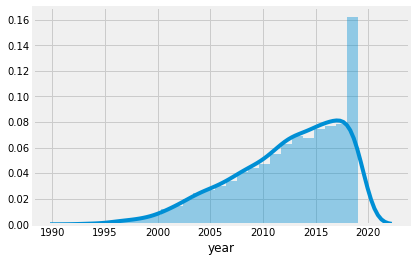

In [13]:
sns.distplot(regular['year'])

년도가 줄어들수록 그 수가 작다

In [14]:
regular['year'].describe()

count    2648.000000
mean     2012.250000
std         5.191261
min      1993.000000
25%      2009.000000
50%      2013.000000
75%      2016.250000
max      2019.000000
Name: year, dtype: float64

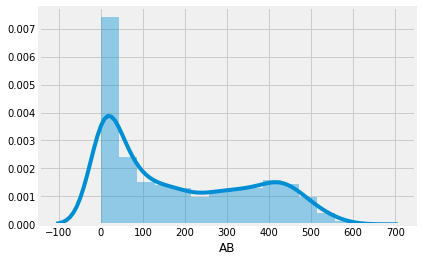

In [15]:
sns.distplot(regular['AB'])

타석에 100번 이하 들어온 타자들이 꽤 많다

In [16]:
regular['AB'].describe()

count    2648.000000
mean      186.751133
std       171.447888
min         0.000000
25%        23.000000
50%       138.000000
75%       342.000000
max       600.000000
Name: AB, dtype: float64

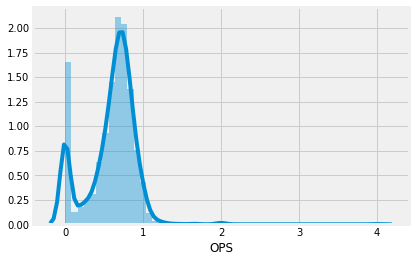

In [17]:
sns.distplot(regular['OPS'].dropna())

ops의 분포는 대략적으로 정규분포를 따른다

In [18]:
regular['OPS'].describe()

count    2648.000000
mean        0.595941
std         0.308147
min         0.000000
25%         0.477229
50%         0.668000
75%         0.786711
max         4.000000
Name: OPS, dtype: float64

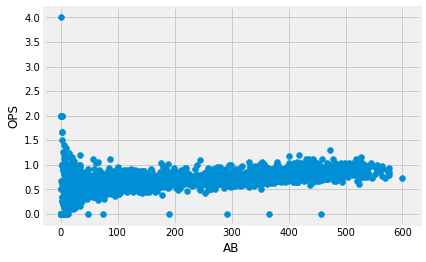

In [19]:
plt.scatter(regular['AB'], regular['OPS'])
plt.xlabel('AB')
plt.ylabel('OPS')

타석수와 OPS는 양의 상관관계를 가진다.
시즌이 진행됨에 따라 잘하는 선수는 많이 기용되고, 못하는 선수는 적게 기용되기 때문이라고 보여짐

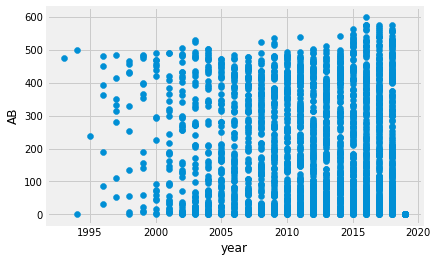

In [20]:
plt.scatter(regular['year'], regular['AB'])
plt.xlabel('year')
plt.ylabel('AB')

In [21]:
regular.groupby('position')['OPS'].mean()

position
내야수(우투양타)    0.235714
내야수(우투우타)    0.606139
내야수(우투좌타)    0.537651
내야수(좌투좌타)    0.691359
외야수(우투양타)    0.542667
외야수(우투우타)    0.588131
외야수(우투좌타)    0.586589
외야수(좌투좌타)    0.596368
포수(우투우타)     0.527660
포수(우투좌타)     0.460944
Name: OPS, dtype: float64

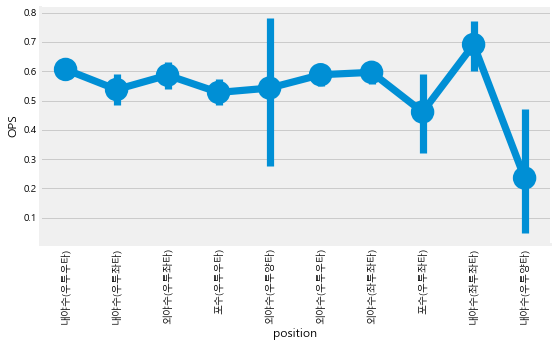

In [23]:
plt.rc('font', family='Malgun Gothic')
a = sns.factorplot('position', 'OPS', data=regular, size=4, aspect=2)
a.set_xticklabels(rotation=90)

# 4. 선수의 운과 진짜 실력 구분하기

야구에는 무척 많은 운적인 요소들이 존재한다.

타자의 미래 성적을 예측함에 있어서 운과 진짜 실력을 구분하는 작업이 매우 중요하다.
예를 들어 보자. KBO의 타자 A와 B는 2018년 같은 타율 0.285을 기록했다.
그런데 선수 A는 운이 좋아서(예를 들어 잘 못하는 투수만 만났다던지 등등) 자기 실력보다 더 높은 타율이 나온 것이고, 선수 B는 운이 나빠서(상대 수비가 엄청 잘했다거나 등등) 자기 실력보다 낮은 타율을 기록한 것이라면 2019년에는 A,B 중에 어느 타자가 더 좋은 성적을 기록할까?
당연히 B가 더 좋은 성적을 낼 가능성이 높을 것이다. 이처럼, 특정 선수 성적의 운과 실력을 제대로만 분류할 수 있다면 단순히 타율 0.285를 기록했다는 정보보다 압도적으로 많은 정보를 얻게 되는 것이다. 이는 분명히 예측에 도움이 될 것이다. 따라서 우린 다양한 스탯(OPS,avg,SLG,1B,2B,3B,HR,BB 등등)들 중에서 운에 영향을 많이 덜 받는, 혹은 운의 영향을 많이 받는 스탯을 골라내는 작업이 중요하다.

ex) 2007 시즌 크보 미스터리: 이현곤 타격왕

   2007 시즌 이현곤은 역대 한국프로야구 역사상 가장 운 좋은 타자였다. 운적인 요소 때문에 실력에 비해 지나치게 높은 성적을 받았다.


그렇다면 어떤 스탯의 운에 의한 영향도를 어떻게 측정할 수 있을까?
어떤 지표 a가 운에 의해 많이 좌우된다면, 선수별로 지표 a의 변동성은 클 것이다.
반대로 만약 지표 a가 운에 의해 많이 좌우되지 않는다면, 선수별로 지표 a의 변동성은 작을 것이다.

이것을 우리는 자기상관이라는 개념으로 수식적으로 접근해볼 것이다. 즉, 각 선수의 연속된 두 시즌간의 특정 스탯의 상관관계를 알아보는 것이다. 이 자기상관의 계수가 낮다면, 해당 스탯은 운에 의해 많은 영향을 받는 변동성이 큰 지표라고 해석할 수 있고, 높다면, 해당 스탯은 운에 의해 영향을 비교적 덜 받는, 다시 말해 선수의 진짜 실력을 잘 나타내주는 지표라고 해석할 수 있을 것이다.

In [36]:
# auto correlation 확인하는 함수
def get_self_corr(var, regular=regular):
    x = []
    y = []
    regular1 = regular.loc[regular['AB'] >= 50,]
    for name in regular1['batter_name'].unique():
        a = regular1.loc[regular1['batter_name'] == name,].sort_values('year')
        k = []
        for i in a['year'].unique():
            if (a['year'] == i+1).sum() == 1:   # 다음 연도의 데이터가 있는 경우에만 append
                k.append(i)
        for i in k:
            x.append(a.loc[a['year'] == i, var].iloc[0])
            y.append(a.loc[a['year'] == i+1, var].iloc[0])
    plt.scatter(x, y)
    plt.title(var)
    plt.show()
    print(pd.Series(x).corr(pd.Series(y))**2)

regular['1B'] = regular['H'] - regular['2B'] - regular['3B'] - regular['HR']

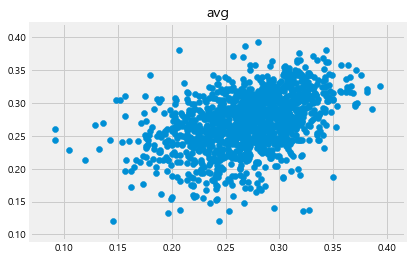

0.179871942515


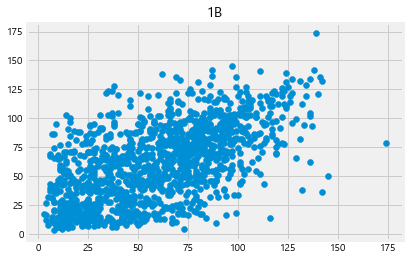

0.357945103497


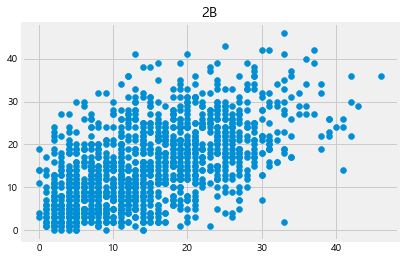

0.321652358866


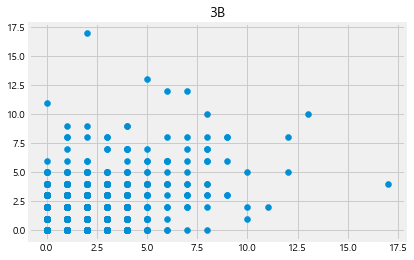

0.200111251492


In [25]:
for i in ['avg','1B','2B','3B']:
    get_self_corr(i)

타율,1루타, 2루타, 3루타의 선수별로 년도 자기상관계수가 낮은 편이다. 이들은 선수의 역량과 관계없는 운적인 요소에 많이 좌우된다는 것을 알 수 있다.

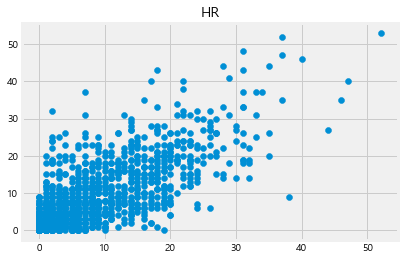

0.550597629294


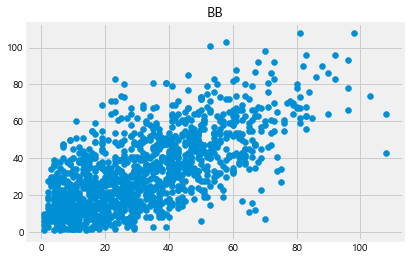

0.45402052126


In [28]:
for i in ['HR','BB']:
    get_self_corr(i)

홈런, 볼넷의 선수별로 년도별 자기상관계수가 높은 편이다. 이는 운적인 요소가 비교적 덜 개입된, 즉 선수의 진짜 실력을 잘 보여주는 지표라고 할 수 있다.

운적인 요소에 많이 영향을 받는 스탯: 1B,2B,3B

운적인 요소에 많이 영향을 받지 않는 스탯: HR,BB,SO

# 5. 새로운 지표 생성

1B_LUCK=(1B)/(AB-HR-SO)

2B_LUCK=(2B)/(AB-HR-SO)

3B_LUCK=(3B)/(AB-HR-SO)

(이 지표들은 운적인 요소에 영향을 많이 받지 않는 HR,BB,SO와 같은 스탯의 영향력을 극소화시키면서, 선수의 해당 시즌 '운빨'을 극단적으로 보여주기 위해 이렇게 만들었다)

이렇게 만든 지표는 해당 시즌 선수가 얼마나 운이 좋았는지를 알려줄 것이다.

In [37]:
regular['1b_luck'] = regular['1B'] / (regular['AB'] - regular['HR'] - regular['SO'])
regular['2b_luck'] = regular['2B'] / (regular['AB'] - regular['HR'] - regular['SO'])
regular['3b_luck'] = regular['3B'] / (regular['AB'] - regular['HR'] - regular['SO'])

위에 만든 luck 지수들을 어떻게 하면 더 똑똑하게 적용할 수 있을지 고민해보세요!!

# 6. Lag 변수

다음 시즌 선수의 성적을 예측함에 있어서 전 시즌 성적은 필수적인 정보일 것이다. 이를 반영한다

In [ ]:
# for j in ['avg', 'G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E','1b_luck','2b_luck','3b_luck']:
#     lag_1 = []
#     for i in range(len(regular)): 
#         if len( regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i]) &
#                            (regular['year'] == regular['year'].iloc[i]-1)][j] ) == 0:
#             lag_1.append(np.nan)
#         else:
#             lag_1.append(regular.loc[(regular['batter_name'] == regular['batter_name'].iloc[i]) &
#                                          (regular['year'] == regular['year'].iloc[i]-1)][j].iloc[0])
    
#     regular['lag_1_' + j] = lag_1
#     print(j)

위의 코드를 apply 함수를 이용해 아주 빨리 실행시키는 것도 가능하다.
(apply를 이용한 코드는 아래 참조)

In [38]:
def get_lag(name, year, var_name, lag_num=1):
    if len(regular.loc[(regular['batter_name'] == name) & (regular['year'] == year-lag_num), var_name]) == 0:
        return np.nan
    else:
        return regular.loc[(regular['batter_name'] == name) & (regular['year'] == year-lag_num), var_name].iloc[0]


for i in ['avg', 'G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E','1b_luck','2b_luck','3b_luck']:
    regular['lag_1_'+i] = regular.apply(lambda x: get_lag(x['batter_name'], x['year'], i), axis=1)
    regular['lag_2_'+i] = regular.apply(lambda x: get_lag(x['batter_name'], x['year'], i, lag_num=2), axis=1)
    regular['lag_3_'+i] = regular.apply(lambda x: get_lag(x['batter_name'], x['year'], i, lag_num=3), axis=1)

# 7. 누적 변수

직전 시즌 성적뿐 아니라, 통산성적도 중요한 변수가 될 수 있다.

In [39]:
def get_nujuk(name, year, var):
    if (len(regular.loc[(regular['batter_name'] == name) & (regular['year'] < year-1), 'H']) != 0):
        return regular.loc[(regular['batter_name'] == name) & (regular['year'] < year-1), var].sum()
    else:
        return np.nan

for i in ['G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO']:
    regular['total_'+i] = regular.apply(lambda x: get_nujuk(x['batter_name'], x['year'], i), axis=1)

# 8. 간단한 모델 빌딩과 검증

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
train = regular.loc[regular['year'] <= 2017,]
test = regular.loc[regular['year'] == 2018,]
y_train = train['OPS']
X_train = train[ [x for x in regular.columns if ('lag' in x) | ('total' in x)] ]

y_test = test['OPS']
X_test = test[ [x for x in regular.columns if ('lag' in x) | ('total' in x)] ]

In [42]:
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train.fillna(-1), y_train, sample_weight=train['AB'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
pred = rf.predict(X_test.fillna(-1))

In [44]:
ab = test['AB']

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred, sample_weight=ab)**0.5

0.12714061879795083

# 9. 2019년 선수 OPS 실제 예측치 내기

In [45]:
train = regular.loc[regular['year'] <= 2018,]
test = regular.loc[regular['year'] == 2019,]
y_train = train['OPS']
X_train = train[ [x for x in regular.columns if ('lag' in x) | ('total' in x)] ]

rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train.fillna(-1), y_train, sample_weight=train['AB'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [46]:
test = regular.loc[regular['year'] == 2019,]

In [47]:
pred = rf.predict(test[ [x for x in regular.columns if ('lag' in x) | ('total' in x)] ].fillna(-1))

In [49]:
pd.DataFrame({'batter_id': test['batter_id'], 'OPS': pred}).to_csv("result/baseline_submission.csv", index=False)